In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
# 1. Linear Regression and Multiple Linear Regression
from sklearn.linear_model import LinearRegression

In [5]:
lm = LinearRegression()
lm

LinearRegression()

In [6]:
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)

LinearRegression()

In [7]:
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [8]:
lm.intercept_

38423.305858157386

In [9]:
lm.coef_

array([-821.73337832])

In [10]:
# Question 1a 
lm1= LinearRegression()
lm1

LinearRegression()

In [12]:
# Question 1b
X = df[['engine-size']]
Y = df['price']
lm1.fit(X,Y)

LinearRegression()

In [13]:
# Question 1c
Yhat = lm1.predict(X)
Yhat[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [14]:
lm1.intercept_

-7963.338906281049

In [15]:
lm1.coef_

array([166.86001569])

In [17]:
# Multiple Linear Regression
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [18]:
lm.fit(Z, df['price'])

LinearRegression()

In [19]:
lm.intercept_

-15806.624626329198

In [20]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [21]:
lm2=LinearRegression()
lm2

LinearRegression()

In [22]:
X = df[['normalized-losses']]
Y = df['price']
lm2.fit(X,Y)

LinearRegression()

In [23]:
lm.intercept_

-15806.624626329198

In [24]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

(0.0, 48158.48377414927)

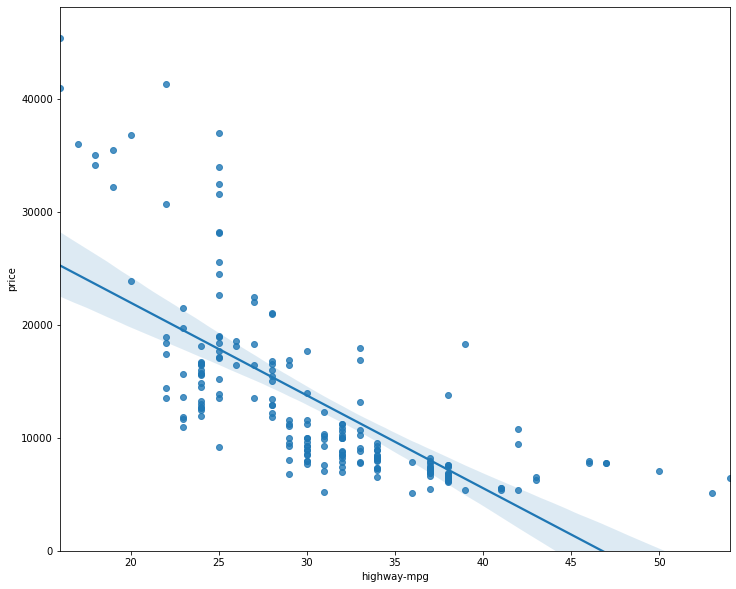

In [26]:
# Model evaluation using visualization
# Let's visualize highway-mpg as potential predictor variable of price
import seaborn as sns
%matplotlib inline
width=12
height=10
plt.figure(figsize=(width,height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)


(0.0, 47414.1)

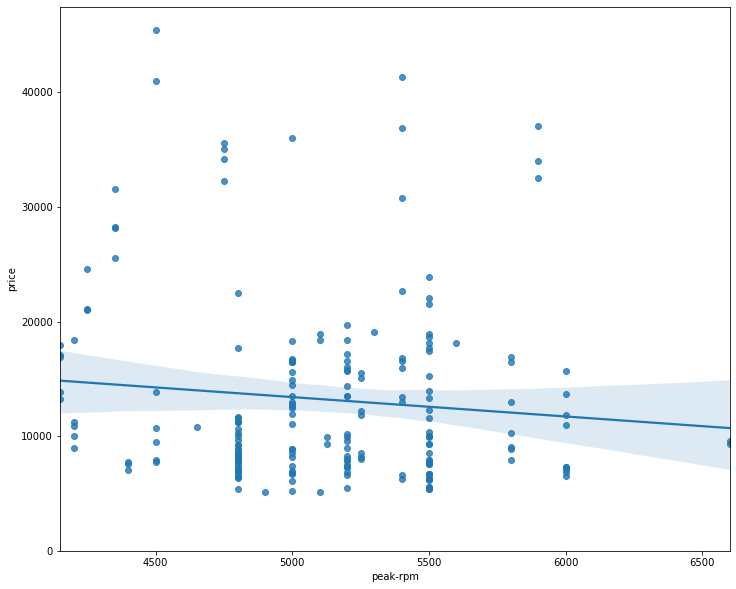

In [27]:
# Regplot for peak-rpm
plt.figure(figsize=(width,height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [28]:
# correlation of "peak-rpm", "highway-mpg" and "price"
df[["peak-rpm", "highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

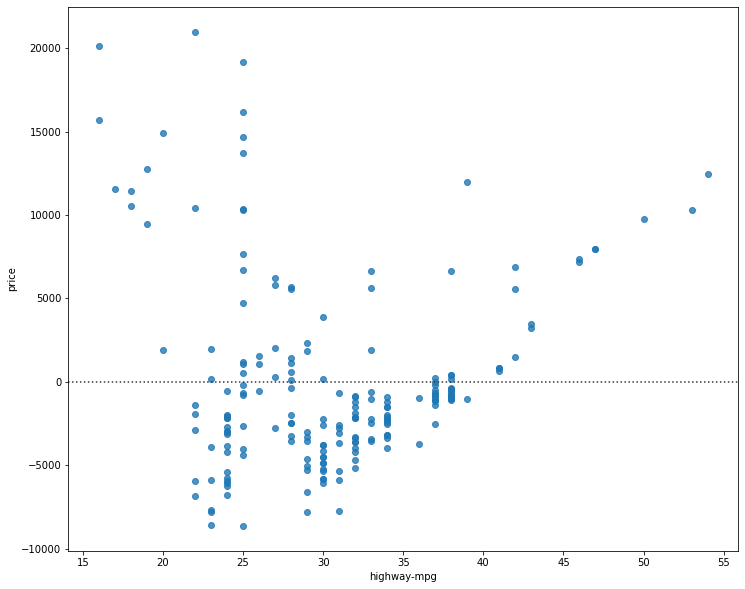

In [30]:
width=12
height=10
plt.figure(figsize=(width,height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show

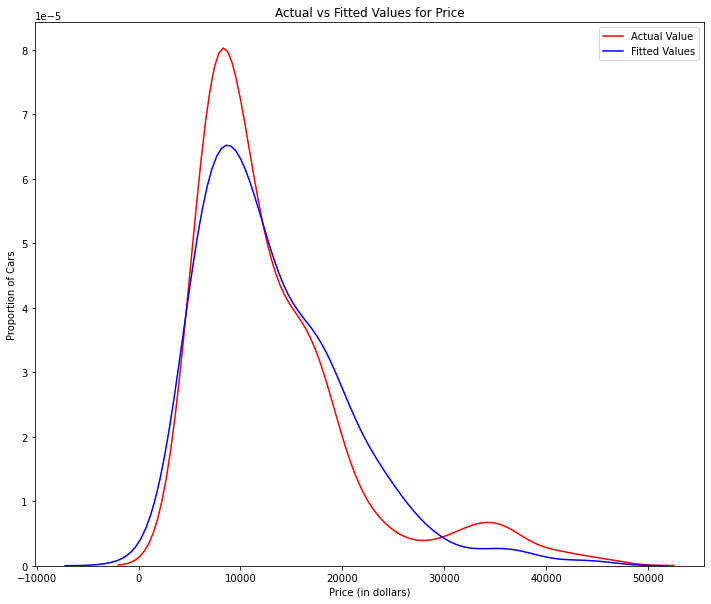

In [31]:
# MLR with distribution plot
Y_hat = lm.predict(Z)
plt.figure(figsize=(width,height))
ax1=sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values", ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.show()
plt.close()

In [32]:
# 3. Polynomial Regression and Pipelines

def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15,55,100)
    y_new = model(x_new)
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898,0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    plt.show()
    plt.close()

In [33]:
x = df['highway-mpg']
y = df['price']

In [34]:
# Here we use a polynomial of the 3rd order (cubic)

f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


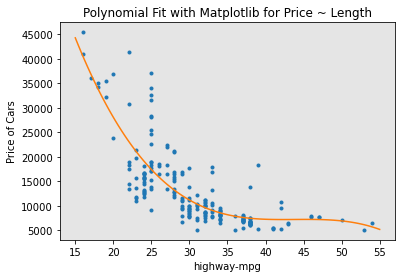

In [35]:
PlotPolly(p, x, y, 'highway-mpg')

In [36]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [37]:
f1 = np.polyfit(x,y,11)
p1 = np.poly1d(f1)
print(p1)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


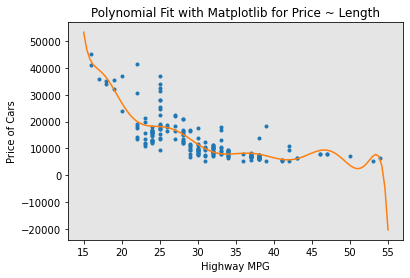

In [38]:
PlotPolly(p1,x,y,'Highway MPG')

In [39]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [40]:
Z_pr = pr.fit_transform(Z)

In [41]:
Z.shape

(201, 4)

In [42]:
Z_pr.shape

(201, 15)

In [43]:
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [45]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

In [46]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [47]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [50]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [52]:
# Question 5
Input1=[('scale',StandardScaler()), ('model', LinearRegression())]
pipe1=Pipeline(Input1)
pipe1.fit(Z,y)
ypipe1=pipe1.predict(Z)
ypipe1[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

In [53]:
# 4. Measures for In-Sample Evaluation / R^2 and MSE
# Let's calculate the R^2
lm.fit(X,Y)
# Find the R^2
print("The R square is:", lm.score(X,Y))

The R square is: 0.017955660792057127


In [54]:
# Let's calculate the MSE
Yhat=lm.predict(X)
print("The output of the first four predicted value is :", Yhat[0:4])

The output of the first four predicted value is : [13207.12935323 13207.12935323 13207.12935323 14604.97026321]


In [55]:
from sklearn.metrics import mean_squared_error

In [56]:
mse = mean_squared_error(df['price'], Yhat)
print("The MSE of price and predicted value is: ", mse)

The MSE of price and predicted value is:  61713291.723551035


In [57]:
lm.fit(Z,df['price'])
print("The R squared is :", lm.score(Z, df['price']))

The R squared is : 0.8093562806577457


In [58]:
Y_predict_multifit = lm.predict(Z)

In [59]:
print("The MSE of price and predicted value using multifit is: ", \
     mean_squared_error(df['price'], Y_predict_multifit))

The MSE of price and predicted value using multifit is:  11980366.87072649


In [60]:
# Model 3 polynomial fit
from sklearn.metrics import r2_score

In [61]:
r_squared = r2_score(y,p(x))
print('The R square value is:', r_squared)

The R square value is: 0.6741946663906513


In [62]:
mean_squared_error(df['price'], p(x))

20474146.42636125

In [63]:
# 5. Prediction and Decision Making
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [65]:
new_input = np.arange(1,100,1).reshape(-1,1)

In [66]:
lm.fit(X,Y)
lm

LinearRegression()

In [67]:
yhat=lm.predict(new_input)
yhat[0:5]

array([9180.01625544, 9213.29818187, 9246.58010829, 9279.86203472,
       9313.14396115])

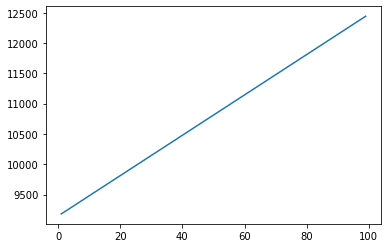

In [68]:
plt.plot(new_input, yhat)
plt.show()